# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See', 'Solomon Islands', 'Timor-Leste', 'Laos'],
 3: ['Saint Kitts and Nevis'],
 4: ['Tanzania', 'Brunei', 'Fiji'],
 5: ['Equatorial Guinea', 'Dominica', 'Grenada'],
 6: ['Cambodia', 'Saint Lucia', 'Mauritius'],
 7: ['Saint Vincent and the Grenadines', 'Seychelles', 'Antigua and Barbuda'],
 8: ['Liechtenstein', 'Bahamas', 'Kyrgyzstan', 'Northern Mariana Islands',
     'Barbados', 'Trinidad and Tobago', 'Madagascar', 'Gambia'],
 9: ['Ghana', 'Uzbekistan', 'Australia', 'Oman', 'Philippines',
     'Sao Tome and Principe', 'Jamaica', 'Vietnam'],
 10: ['Chile', 'Bhutan', 'Libya', 'Senegal', 'Suriname', 'Zimbabwe', 'Burundi',
      'Guam', 'Iraq', 'Guatemala', 'Angola', 'Papua New Guinea', 'Ethiopia',
      'Rwanda', 'Venezuela', 'Andorra', 'Djibouti', 'Bolivia', 'Kazakhstan',
      'Maldives', 'Mongolia', 'Honduras', 'Mozambique', 'Lesotho', 'Bahrain',
      'Zambia', 'Botswana', 'El Salvador', 'Kuwait', 'Monaco', 'Eritrea',
      'Cape Verde', 'Republic of the Congo', 'Guyana', 

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

8

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Italy', 'Netherlands', 'Finland', 'Portugal', 'United Kingdom', 'Norway',
      'Malaysia'],
 18: ['Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  19Jan2020  23Mar2020    82905782
        1st    Past  24Mar2020  04Apr2020    82905782
        2nd    Past  05Apr2020  21Apr2020    82905782
        3rd    Past  22Apr2020  17Jun2020    82905782
        4th    Past  18Jun2020  15Aug2020    82905782
        5th    Past  16Aug2020  16Sep2020    82905782
        6th    Past  17Sep2020  08Oct2020    82905782
        7th    Past  09Oct2020  20Oct2020    82905782
        8th    Past  21Oct2020  27Oct2020    82905782
        9th    Past  28Oct2020  03Nov2020    82905782
        10th   Past  04Nov2020  10Nov2020    82905782
        11th   Past  11Nov2020  17Nov2020    82905782
        12th   Past  18Nov2020  24Nov2020    82905782
        13th   Past  25Nov2020  01Dec2020    82905782
        14th   Past  02Dec2020  08Dec2020    82905782
        15th   Past  09Dec2020  14Dec2020    82905782
        16th   Past  15Dec2020  20Dec2020    82905782
        17th   Past  21Dec2020  31Dec2020    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NOR,  9th phase (29Oct2020 - 03Nov2020): finished  230 trials in 0 min 10 sec

	MYS, 10th phase (03Nov2020 - 12Nov2020): finished  229 trials in 0 min 10 sec

	PRT,  6th phase (25Sep2020 - 12Oct2020): finished  227 trials in 0 min 10 sec

	NLD,  1st phase (08Apr2020 - 01May2020): finished  223 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  254 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 19Sep2020): finished  255 trials in 0 min 10 sec

	MYS, 15th phase (15Dec2020 - 24Dec2020): finished  259 trials in 0 min 10 sec

	MYS,  4th phase (02Jun2020 - 10Sep2020): finished  234 trials in 0 min 10 sec

	MYS, 14th phase (05Dec2020 - 14Dec2020): finished  232 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  227 trials in 0 min 10 sec

	ITA,  9th phase (28Oct2020 - 06Nov2020): finished  237 trials in 0 min 10 sec

	PRT,  1st phase (08Apr2020 - 05May2020): finished  231 trials in 0 min 10 sec

	DEU, 15th phase (09Dec2020 - 14Dec2020): finished  262 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 27May2020): finished  256 trials in 0 min 10 sec

	MYS,  9th phase (28Oct2020 - 02Nov2020): finished  264 trials in 0 min 10 sec

	FIN, 12th phase (26Nov2020 - 01Dec2020): finished  263 trials in 0 min 10 sec

	PRT, 12th phase (26Nov2020 - 02Dec2020): finished  245 trials in 0 min 10 sec

	FIN, 16th phase (22Dec2020 - 31Dec2020): finished  243 trials in 0 min 10 sec

	FIN,  6th phase (23Sep2020 - 07Oct2020): finished  242 trials in 0 min 10 sec

	PRT,  9th phase (29Oct2020 - 04Nov2020): finished  243 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  260 trials in 0 min 10 sec

	DEU, 16th phase (15Dec2020 - 20Dec2020): finished  260 trials in 0 min 10 sec

	GBR,  5th phase (17Sep2020 - 02Oct2020): finished  256 trials in 0 min 10 sec

	NLD,  7th phase (14Oct2020 - 19Oct2020): finished  259 trials in 0 min 10 sec

	FIN,  8th phase (19Oct2020 - 28Oct2020): finished  246 trials in 0 min 10 sec

	MYS, 13th phase (29Nov2020 - 04Dec2020): finished  249 trials in 0 min 10 sec

	MYS,  8th phase (18Oct2020 - 27Oct2020): finished  250 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 25Mar2020): finished  251 trials in 0 min 10 sec

	ITA,  4th phase (12May2020 - 28Aug2020): finished  218 trials in 0 min 10 sec

	ITA,  5th phase (29Aug2020 - 30Sep2020): finished  236 trials in 0 min 10 sec

	NLD, 15th phase (10Dec2020 - 19Dec2020): finished  242 trials in 0 min 10 sec

	MYS,  1st phase (25Mar2020 - 08Apr2020): finished  240 trials in 0 min 10 sec

	NLD,  5th phase (27Sep2020 - 06Oct2020): finished  239 trials in 0 min 10 sec

	ITA, 12th phase (27Nov2020 - 02Dec2020): finished  240 trials in 0 min 10 sec

	ITA, 15th phase (16Dec2020 - 22Dec2020): finished  240 trials in 0 min 10 sec

	GBR, 13th phase (25Nov2020 - 02Dec2020): finished  240 trials in 0 min 10 sec

	FIN,  7th phase (08Oct2020 - 18Oct2020): finished  237 trials in 0 min 10 sec

	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  234 trials in 0 min 10 sec

	GBR, 16th phase (16Dec2020 - 31Dec2020): finished  234 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  226 trials in 0 min 10 sec

	MYS, 16th phase (25Dec2020 - 31Dec2020): finished  243 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  239 trials in 0 min 10 sec

	ITA, 13th phase (03Dec2020 - 09Dec2020): finished  243 trials in 0 min 10 sec

	ITA, 10th phase (07Nov2020 - 16Nov2020): finished  242 trials in 0 min 10 sec

	FIN,  5th phase (21Aug2020 - 22Sep2020): finished  236 trials in 0 min 10 sec

	FIN,  9th phase (29Oct2020 - 08Nov2020): finished  239 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  226 trials in 0 min 10 sec

	ITA,  1st phase (20Mar2020 - 31Mar2020): finished  238 trials in 0 min 10 sec

	PRT, 10th phase (05Nov2020 - 14Nov2020): finished  238 trials in 0 min 10 sec

	NLD, 12th phase (19Nov2020 - 25Nov2020): finished  237 trials in 0 min 10 sec

	ITA, 16th phase (23Dec2020 - 31Dec2020): finished  237 trials in 0 min 10 sec

	ITA, 11th phase (17Nov2020 - 26Nov2020): finished  239 trials in 0 min 10 sec

	NOR,  1st phase (26Mar2020 - 05Apr2020): finished  224 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  220 trials in 0 min 10 sec

	ITA,  3rd phase (17Apr2020 - 11May2020): finished  217 trials in 0 min 10 sec

	DEU, 17th phase (21Dec2020 - 31Dec2020): finished  224 trials in 0 min 10 sec

	MYS,  5th phase (11Sep2020 - 03Oct2020): finished  226 trials in 0 min 10 sec

	FIN, 10th phase (09Nov2020 - 18Nov2020): finished  232 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 07Apr2020): finished  224 trials in 0 min 10 sec

	NLD, 16th phase (20Dec2020 - 31Dec2020): finished  236 trials in 0 min 10 sec

	NOR, 13th phase (01Dec2020 - 08Dec2020): finished  234 trials in 0 min 10 sec

	DEU,  9th phase (28Oct2020 - 03Nov2020): finished  235 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  234 trials in 0 min 10 sec

	NLD,  3rd phase (10Aug2020 - 12Sep2020): finished  232 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  233 trials in 0 min 10 sec

	DEU, 14th phase (02Dec2020 - 08Dec2020): finished  243 trials in 0 min 10 sec

	NLD, 14th phase (04Dec2020 - 09Dec2020): finished  242 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  238 trials in 0 min 10 sec

	NLD,  6th phase (07Oct2020 - 13Oct2020): finished  239 trials in 0 min 10 sec

	MYS, 12th phase (23Nov2020 - 28Nov2020): finished  239 trials in 0 min 10 sec

	NLD, 10th phase (05Nov2020 - 11Nov2020): finished  237 trials in 0 min 10 sec

	ITA,  8th phase (22Oct2020 - 27Oct2020): finished  239 trials in 0 min 10 sec

	MYS,  3rd phase (02May2020 - 01Jun2020): finished  230 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 19Mar2020): finished  232 trials in 0 min 10 sec

	PRT,  2nd phase (06May2020 - 13Jun2020): finished  228 trials in 0 min 10 sec

	NLD, 13th phase (26Nov2020 - 03Dec2020): finished  237 trials in 0 min 10 sec

	NLD,  8th phase (20Oct2020 - 29Oct2020): finished  235 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 17Jun2020): finished  222 trials in 0 min 10 sec

	PRT,  3rd phase (14Jun2020 - 14Jul2020): finished  231 trials in 0 min 10 sec

	PRT,  8th phase (22Oct2020 - 28Oct2020): finished  240 trials in 0 min 10 sec

	PRT, 11th phase (15Nov2020 - 25Nov2020): finished  228 trials in 0 min 10 sec

	PRT,  4th phase (15Jul2020 - 02Sep2020): finished  218 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 30Nov2020): finished  229 trials in 0 min 10 sec

	NOR, 14th phase (09Dec2020 - 15Dec2020): finished  231 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 07Aug2020): finished  221 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  243 trials in 0 min 10 sec

	NLD,  4th phase (13Sep2020 - 26Sep2020): finished  240 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  232 trials in 0 min 10 sec

	MYS,  0th phase (11Feb2020 - 24Mar2020): finished  232 trials in 0 min 10 sec

	NOR,  6th phase (20Sep2020 - 05Oct2020): finished  240 trials in 0 min 10 sec

	NOR,  7th phase (06Oct2020 - 20Oct2020): finished  238 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  235 trials in 0 min 10 sec

	FIN,  4th phase (28May2020 - 20Aug2020): finished  217 trials in 0 min 10 sec

	GBR,  4th phase (08Aug2020 - 16Sep2020): finished  229 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  230 trials in 0 min 10 sec

	MYS,  2nd phase (09Apr2020 - 01May2020): finished  227 trials in 0 min 10 sec

	MYS,  6th phase (04Oct2020 - 11Oct2020): finished  216 trials in 0 min 10 sec

	FIN, 15th phase (15Dec2020 - 21Dec2020): finished  218 trials in 0 min 10 sec

	NLD, 11th phase (12Nov2020 - 18Nov2020): finished  220 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  214 trials in 0 min 10 sec

	MYS,  7th phase (12Oct2020 - 17Oct2020): finished  265 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  263 trials in 0 min 10 sec

	NOR, 10th phase (04Nov2020 - 09Nov2020): finished  266 trials in 0 min 10 sec

	ITA,  6th phase (01Oct2020 - 14Oct2020): finished  265 trials in 0 min 10 sec

	NOR,  8th phase (21Oct2020 - 28Oct2020): finished  266 trials in 0 min 10 sec

	NLD,  9th phase (30Oct2020 - 04Nov2020): finished  267 trials in 0 min 10 sec

	PRT,  5th phase (03Sep2020 - 24Sep2020): finished  258 trials in 0 min 10 sec

	NLD,  2nd phase (02May2020 - 09Aug2020): finished  237 trials in 0 min 10 sec

	NOR, 11th phase (10Nov2020 - 22Nov2020): finished  259 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 02May2020): finished  261 trials in 0 min 10 sec

	NOR,  3rd phase (03May2020 - 05Aug2020): finished  242 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  263 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 07Apr2020): finished  262 trials in 0 min 10 sec

	DEU, 11th phase (11Nov2020 - 17Nov2020): finished  266 trials in 0 min 10 sec

	ITA, 14th phase (10Dec2020 - 15Dec2020): finished  268 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  256 trials in 0 min 10 sec

	DEU, 10th phase (04Nov2020 - 10Nov2020): finished  261 trials in 0 min 10 sec

	MYS, 11th phase (13Nov2020 - 22Nov2020): finished  256 trials in 0 min 10 sec

	DEU,  8th phase (21Oct2020 - 27Oct2020): finished  265 trials in 0 min 10 sec

	ITA,  2nd phase (01Apr2020 - 16Apr2020): finished  260 trials in 0 min 10 sec

	ITA,  7th phase (15Oct2020 - 21Oct2020): finished  269 trials in 0 min 10 sec

Completed optimization. Total: 5 min 48 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt     theta  \
Country Phase                                                                   
Germany 0th    Past  19Jan2020  23Mar2020    82905782  SIR-F  30.32  0.001492   
        1st    Past  24Mar2020  04Apr2020    82905782  SIR-F   4.78  0.016332   
        2nd    Past  05Apr2020  21Apr2020    82905782  SIR-F   0.54  0.031440   
        3rd    Past  22Apr2020  17Jun2020    82905782  SIR-F   0.54  0.029872   
        4th    Past  18Jun2020  15Aug2020    82905782  SIR-F   1.15  0.003799   
        5th    Past  16Aug2020  16Sep2020    82905782  SIR-F   1.31  0.001567   
        6th    Past  17Sep2020  08Oct2020    82905782  SIR-F   1.32  0.001596   
        7th    Past  09Oct2020  20Oct2020    82905782  SIR-F   3.13  0.000676   
        8th    Past  21Oct2020  27Oct2020    82905782  SIR-F   3.03  0.002617   
        9th    Past  28Oct2020  03Nov2020    82905782  SIR-F   2.25  0.000121   
        10th   Past  04Nov2020  10Nov2020    82905782  SIR-F   1.46  0.000663   
        11th   Past  11Nov2020  17Nov2020    82905782  SIR-F   1.07  0.005338   
        12th   Past  18Nov2020  24Nov2020    82905782  SIR-F   0.97  0.005474   
        13th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.91  0.015973   
        14th   Past  02Dec2020  08Dec2020    82905782  SIR-F   0.98  0.002696   
        15th   Past  09Dec2020  14Dec2020    82905782  SIR-F   1.20  0.003232   
        16th   Past  15Dec2020  20Dec2020    82905782  SIR-F   1.60  0.001293   
        17th   Past  21Dec2020  31Dec2020    82905782  SIR-F   1.04  0.000665   

                  kappa       rho     sigma  tau  1/beta [day]  alpha1 [-]  \
Country Phase                                                                
Germany 0th    0.000595  0.033144  0.000496  360             7       0.001   
        1st    0.000983  0.022742  0.003695  360            10       0.016   
        2nd    0.000610  0.011727  0.020404  360            21       0.031   
        3rd    0.000067  0.012880  0.023007  360            19       0.030   
        4th    0.000002  0.016271  0.014131  360            15       0.004   
        5th    0.000191  0.016323  0.012231  360            15       0.002   
        6th    0.000002  0.018240  0.013845  360            13       0.002   
        7th    0.000067  0.025767  0.008159  360             9       0.001   
        8th    0.000301  0.027295  0.008689  360             9       0.003   
        9th    0.000229  0.018150  0.007819  360            13       0.000   
        10th   0.000235  0.017534  0.011784  360            14       0.001   
        11th   0.000180  0.017378  0.015998  360            14       0.005   
        12th   0.000093  0.017061  0.017400  360            14       0.005   
        13th   0.000288  0.014666  0.015628  360            17       0.016   
        14th   0.000301  0.018904  0.018859  360            13       0.003   
        15th   0.000309  0.019559  0.015960  360            12       0.003   
        16th   0.000191  0.020386  0.012538  360            12       0.001   
        17th   0.000068  0.014221  0.013637  360            17       0.001   

               1/alpha2 [day]  1/gamma [day]     RMSLE  Trials       Runtime  
Country Phase                                                                 
Germany 0th               419            503  1.160641     226  0 min 10 sec  
        1st               254             67  0.164842     254  0 min 10 sec  
        2nd               409             12  0.145060     263  0 min 10 sec  
        3rd              3708             10  0.104533     222  0 min 10 sec  
        4th            134910             17  0.115410     226  0 min 10 sec  
        5th              1305             20  0.064256     233  0 min 10 sec  
        6th            134911             18  0.031307     227  0 min 10 sec  
        7th              3708             30  0.064905     214  0 min 10 sec  
        8th               829             2

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-01-19,Germany,0.00149186,0.000595437,0.0331438,0.000496104,0.001,419,7,503,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-01-19,Germany,0.00149186,0.000595437,0.0331438,0.000496104,0.001,419,7,503,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-19,Germany,0.00149186,0.000595437,0.0331438,0.000496104,0.001,419,7,503,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-19,Germany,0.00149186,0.000595437,0.0331438,0.000496104,0.001,419,7,503,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-19,Germany,0.00149186,0.000595437,0.0331438,0.000496104,0.001,419,7,503,...,0,0,0,0,0,0,0,0,0,0.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

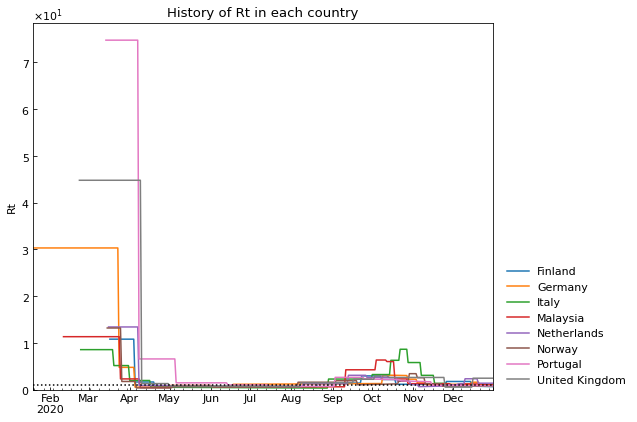

Country,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,,
2020-12-27,0.66,1.04,0.72,1.0,1.39,0.87,0.8,2.46
2020-12-28,0.66,1.04,0.72,1.0,1.39,0.87,0.8,2.46
2020-12-29,0.66,1.04,0.72,1.0,1.39,0.87,0.8,2.46
2020-12-30,0.66,1.04,0.72,1.0,1.39,0.87,0.8,2.46
2020-12-31,0.66,1.04,0.72,1.0,1.39,0.87,0.8,2.46


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

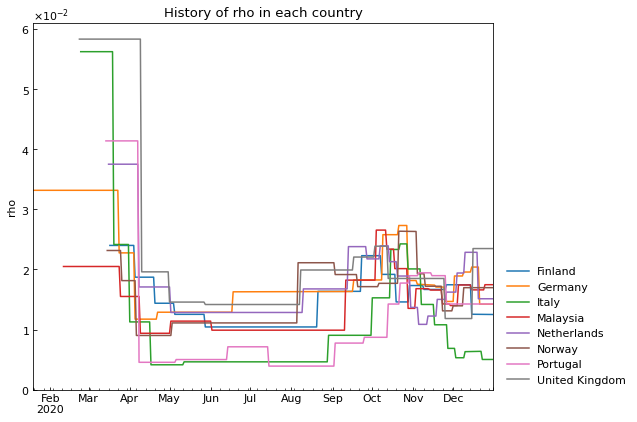

Country,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,,
2020-12-27,0.012502,0.014221,0.005026,0.017453,0.015116,0.016959,0.014246,0.023461
2020-12-28,0.012502,0.014221,0.005026,0.017453,0.015116,0.016959,0.014246,0.023461
2020-12-29,0.012502,0.014221,0.005026,0.017453,0.015116,0.016959,0.014246,0.023461
2020-12-30,0.012502,0.014221,0.005026,0.017453,0.015116,0.016959,0.014246,0.023461
2020-12-31,0.012502,0.014221,0.005026,0.017453,0.015116,0.016959,0.014246,0.023461


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

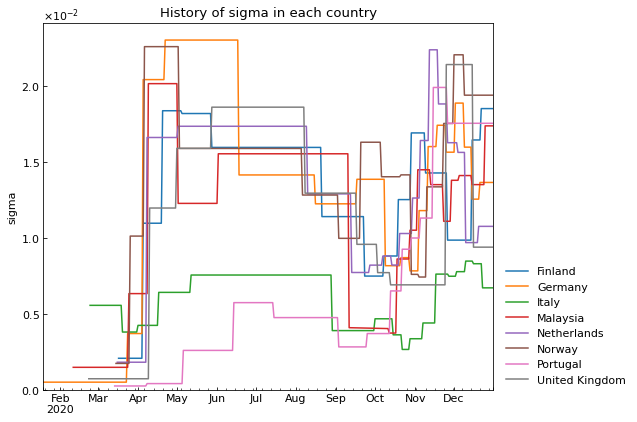

Country,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,,
2020-12-27,0.018497,0.013637,0.006702,0.017361,0.010748,0.01938,0.01753,0.00938
2020-12-28,0.018497,0.013637,0.006702,0.017361,0.010748,0.01938,0.01753,0.00938
2020-12-29,0.018497,0.013637,0.006702,0.017361,0.010748,0.01938,0.01753,0.00938
2020-12-30,0.018497,0.013637,0.006702,0.017361,0.010748,0.01938,0.01753,0.00938
2020-12-31,0.018497,0.013637,0.006702,0.017361,0.010748,0.01938,0.01753,0.00938


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

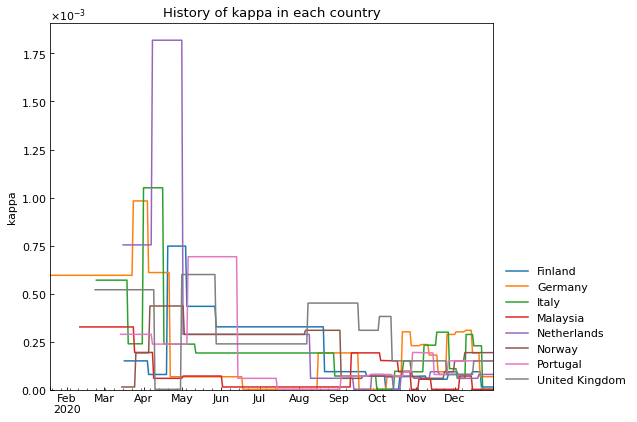

Country,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,,
2020-12-27,0.000014,0.000068,0.000002,0.000002,0.000079,0.000193,0.00015,0.00015
2020-12-28,0.000014,0.000068,0.000002,0.000002,0.000079,0.000193,0.00015,0.00015
2020-12-29,0.000014,0.000068,0.000002,0.000002,0.000079,0.000193,0.00015,0.00015
2020-12-30,0.000014,0.000068,0.000002,0.000002,0.000079,0.000193,0.00015,0.00015
2020-12-31,0.000014,0.000068,0.000002,0.000002,0.000079,0.000193,0.00015,0.00015


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

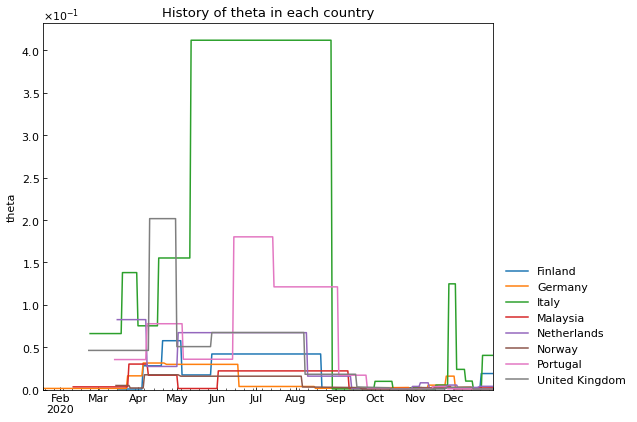

Country,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,,,
2020-12-27,0.019041,0.000665,0.040461,0.002172,0.003965,0.001212,0.001015,0.000898
2020-12-28,0.019041,0.000665,0.040461,0.002172,0.003965,0.001212,0.001015,0.000898
2020-12-29,0.019041,0.000665,0.040461,0.002172,0.003965,0.001212,0.001015,0.000898
2020-12-30,0.019041,0.000665,0.040461,0.002172,0.003965,0.001212,0.001015,0.000898
2020-12-31,0.019041,0.000665,0.040461,0.002172,0.003965,0.001212,0.001015,0.000898


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27214 entries, 0 to 27311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 27214 non-null  datetime64[ns]
 1   Country                              27214 non-null  object        
 2   Rt                                   27214 non-null  float64       
 3   theta                                27214 non-null  float64       
 4   kappa                                27214 non-null  float64       
 5   rho                                  27214 non-null  float64       
 6   sigma                                27214 non-null  float64       
 7   School_closing                       27214 non-null  int64         
 8   Workplace_closing                    27214 non-null  int64         
 9   Cancel_events                        27214 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.132626,0.289791,0.765116,-0.526298,-0.227873,-0.346170,-0.578720,-0.511331,-0.266174,-0.199473,-0.359455,-0.474637,-0.349333,-0.494651,-0.285780,-0.409718
theta,-0.132626,1.000000,-0.059592,-0.328535,-0.138177,0.497915,0.016003,0.130552,-0.145463,0.556177,0.055359,0.293924,-0.097046,0.086770,-0.073341,0.170128,0.010885
kappa,0.289791,-0.059592,1.000000,0.329993,-0.173653,0.175197,-0.017385,-0.214697,-0.230149,-0.107468,0.064603,-0.116964,-0.205379,-0.183625,-0.496805,-0.221097,0.040241
rho,0.765116,-0.328535,0.329993,1.000000,-0.355592,-0.316869,-0.295266,-0.523290,-0.383392,-0.466970,-0.228547,-0.364203,-0.419601,-0.212290,-0.417232,-0.190986,-0.273036
sigma,-0.526298,-0.138177,-0.173653,-0.355592,1.000000,0.127689,0.244258,0.334601,0.417693,-0.144641,-0.025994,0.055040,0.210807,0.243431,0.267141,0.098645,0.222822
School_closing,-0.227873,0.497915,0.175197,-0.316869,0.127689,1.000000,0.518890,0.491040,0.314643,0.413120,0.458846,0.531346,0.037959,0.285581,-0.048587,-0.006430,0.593332
Workplace_closing,-0.346170,0.016003,-0.017385,-0.295266,0.244258,0.518890,1.000000,0.699390,0.687798,0.296598,0.698555,0.530484,0.197827,0.438633,0.225384,-0.096798,0.760167
Cancel_events,-0.578720,0.130552,-0.214697,-0.523290,0.334601,0.491040,0.699390,1.000000,0.682688,0.371323,0.510385,0.567327,0.394568,0.553570,0.457872,0.090561,0.707301
Gatherings_restrictions,-0.511331,-0.145463,-0.230149,-0.383392,0.417693,0.314643,0.687798,0.682688,1.000000,0.127680,0.494524,0.457028,0.279526,0.426738,0.448914,0.011989,0.712350
Transport_closing,-0.266174,0.556177,-0.107468,-0.466970,-0.144641,0.413120,0.296598,0.371323,0.127680,1.000000,0.306758,0.592737,-0.014778,0.208861,-0.028039,0.121937,0.269570


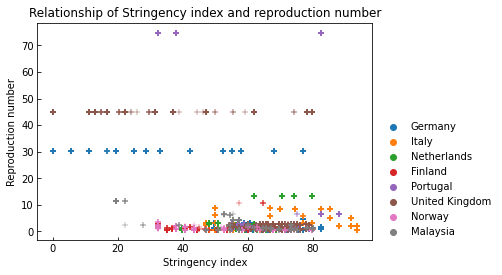

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()